In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=40624dc04d24ff7a235ef8323bb4e33c8b095fc5faeb5f4b4109fc419c3a1d72
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc



🧩 Task 1: Custom Quantum Teleportation Circuit


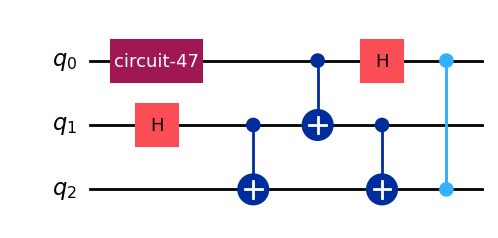

✅ Task 1 — Teleportation Fidelity: 1.000000



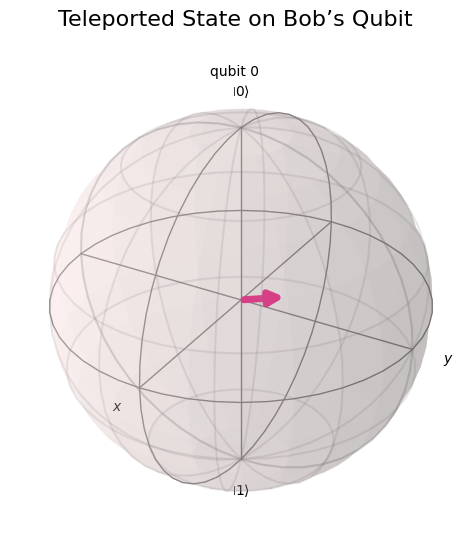

🧩 Task 2: Circuit with Classical Measurement Added


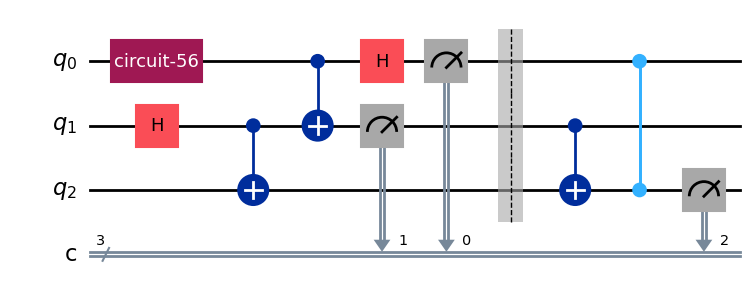

Measurement Results:


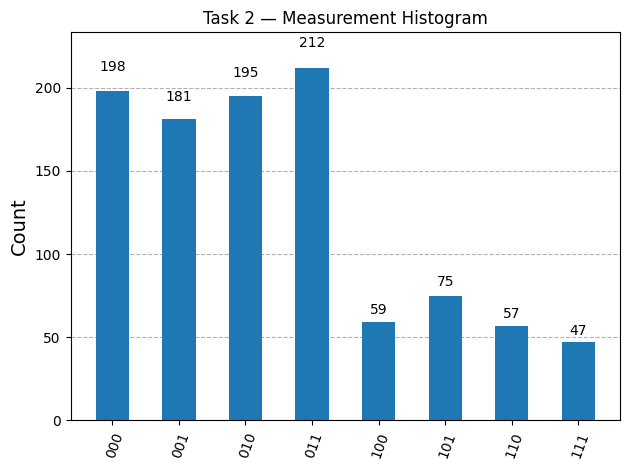

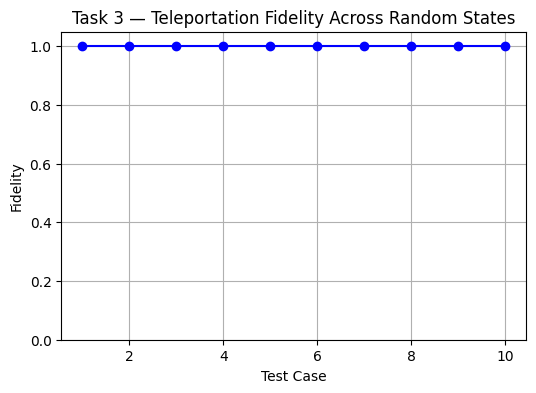


🧩 Task 4: Bloch Sphere Evolution (Simplified)


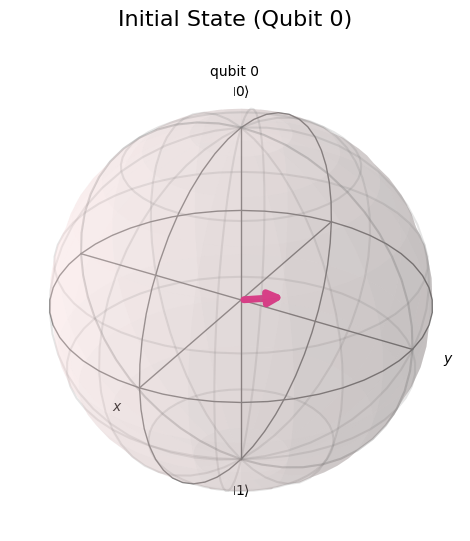

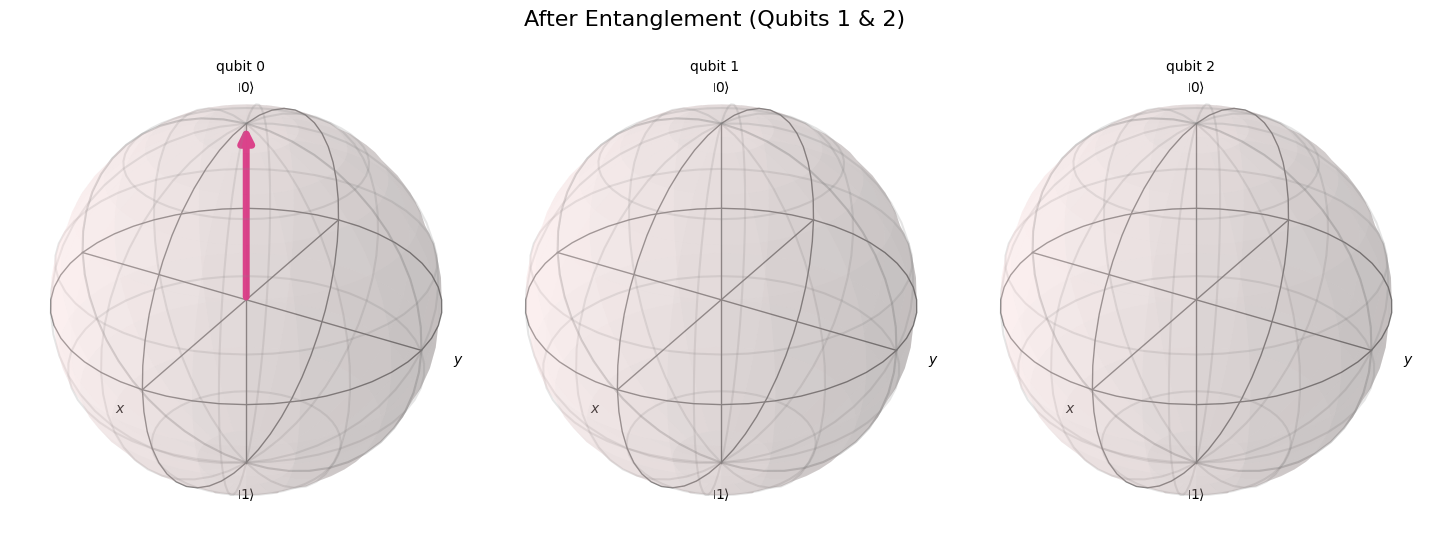

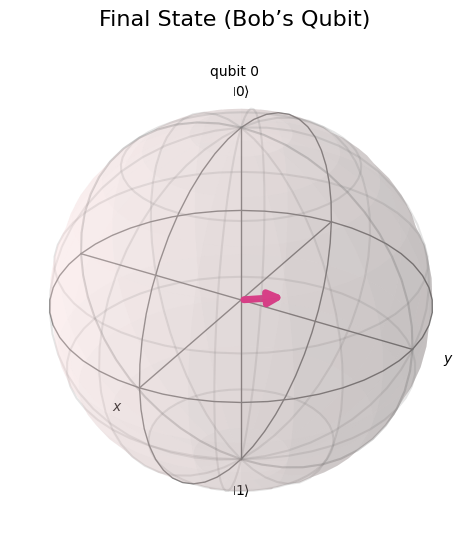


🧩 Task 5: Quantum Teleportation with Depolarizing Noise


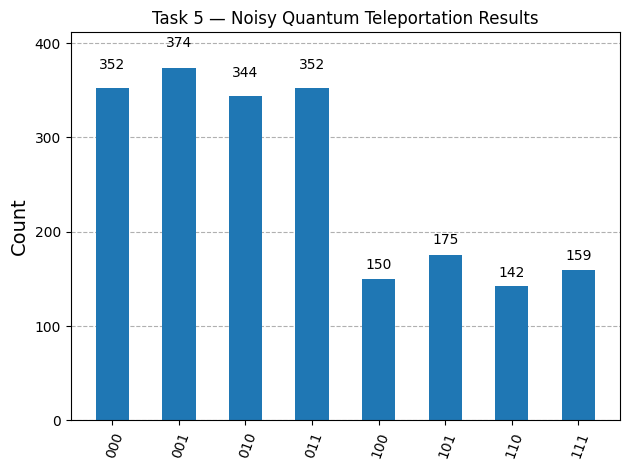

In [2]:
!pip install qiskit qiskit-aer matplotlib numpy --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.quantum_info import Statevector, state_fidelity, partial_trace
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np
import matplotlib.pyplot as plt


def create_input_state(theta, phi):
    qc = QuantumCircuit(1)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    return qc

# Initialize simulator
sim = AerSimulator()

# ===============================================================
# 🧩 Task 1 – Custom State Teleportation
# ===============================================================
theta, phi = np.pi / 3, np.pi / 4

qc1 = QuantumCircuit(3)
qc1.append(create_input_state(theta, phi), [0])
qc1.h(1)
qc1.cx(1, 2)
qc1.cx(0, 1)
qc1.h(0)
qc1.cx(1, 2)
qc1.cz(0, 2)

print("\n🧩 Task 1: Custom Quantum Teleportation Circuit")
display(qc1.draw("mpl"))

# Simulate and calculate fidelity
psi_in = Statevector.from_instruction(create_input_state(theta, phi))
psi_out = Statevector.from_instruction(qc1)
bob_state = partial_trace(psi_out, [0, 1])
fidelity = state_fidelity(psi_in, bob_state)

print(f"✅ Task 1 — Teleportation Fidelity: {fidelity:.6f}\n")
display(plot_bloch_multivector(bob_state, title="Teleported State on Bob’s Qubit"))

# ===============================================================
# 🧩 Task 2 – Add Classical Measurement
# ===============================================================
qc2 = QuantumCircuit(3, 3)
qc2.append(create_input_state(theta, phi), [0])
qc2.h(1)
qc2.cx(1, 2)
qc2.cx(0, 1)
qc2.h(0)
qc2.measure([0, 1], [0, 1])
qc2.barrier()
qc2.cx(1, 2)
qc2.cz(0, 2)
qc2.measure(2, 2)

print("🧩 Task 2: Circuit with Classical Measurement Added")
display(qc2.draw("mpl"))

compiled = transpile(qc2, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
print("Measurement Results:")
display(plot_histogram(counts, title="Task 2 — Measurement Histogram"))

# ===============================================================
# 🧩 Task 3 – Fidelity Analysis for Multiple Random States
# ===============================================================
def teleportation_fidelity(theta, phi):
    qc = QuantumCircuit(3)
    qc.append(create_input_state(theta, phi), [0])
    qc.h(1)
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.h(0)
    qc.cx(1, 2)
    qc.cz(0, 2)
    psi_in = Statevector.from_instruction(create_input_state(theta, phi))
    psi_out = Statevector.from_instruction(qc)
    bob_state = partial_trace(psi_out, [0, 1])
    return state_fidelity(psi_in, bob_state)

thetas = np.linspace(0, np.pi, 10)
phis = np.linspace(0, np.pi, 10)
fidelities = [teleportation_fidelity(t, p) for t, p in zip(thetas, phis)]

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), fidelities, marker="o", color="blue")
plt.title("Task 3 — Teleportation Fidelity Across Random States")
plt.xlabel("Test Case")
plt.ylabel("Fidelity")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

# ===============================================================
# 🧩 Task 4 – Step-by-Step Visualization
# ===============================================================
print("\n🧩 Task 4: Bloch Sphere Evolution (Simplified)")

# Step 1: Initial state
qc_init = create_input_state(theta, phi)
state_init = Statevector.from_instruction(qc_init)
display(plot_bloch_multivector(state_init, title="Initial State (Qubit 0)"))

# Step 2: After Entanglement
qc_ent = QuantumCircuit(3)
qc_ent.h(1)
qc_ent.cx(1, 2)
state_ent = Statevector.from_instruction(qc_ent)
display(plot_bloch_multivector(state_ent, title="After Entanglement (Qubits 1 & 2)"))

# Step 3: After Teleportation
state_final = Statevector.from_instruction(qc1)
bob_state_final = partial_trace(state_final, [0, 1])
display(plot_bloch_multivector(bob_state_final, title="Final State (Bob’s Qubit)"))

# ===============================================================
# 🧩 Task 5 – Introduce Noise and Observe Effect
# ===============================================================
qc_noisy = qc1.copy()
qc_noisy.measure_all()

noise_model = NoiseModel()
error_1q = depolarizing_error(0.02, 1)
error_2q = depolarizing_error(0.05, 2)
noise_model.add_all_qubit_quantum_error(error_1q, ["h", "x", "z"])
noise_model.add_all_qubit_quantum_error(error_2q, ["cx"])

sim_noisy = AerSimulator(noise_model=noise_model)
compiled_noisy = transpile(qc_noisy, sim_noisy)
result_noisy = sim_noisy.run(compiled_noisy, shots=2048).result()
noisy_counts = result_noisy.get_counts()

print("\n🧩 Task 5: Quantum Teleportation with Depolarizing Noise")
display(plot_histogram(noisy_counts, title="Task 5 — Noisy Quantum Teleportation Results"))